Install **tensorflow_decision_forests** lib

In [1]:
pip install tensorflow_decision_forests

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installatio

Install **wurlitzer** lib

In [2]:
pip install wurlitzer

Import libraries

In [3]:
import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math

Limit height of output

In [4]:
from IPython.core.magic import register_line_magic
from IPython.display import Javascript
from IPython.display import display as ipy_display

# Some of the model training logs can cover the full
# screen if not compressed to a smaller viewport.
# This magic allows setting a max height for a cell.
@register_line_magic
def set_cell_height(size):
  ipy_display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

Check version

In [5]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.11.0


Mount ggdrive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

import os
path = "/content/drive/MyDrive/Class/nam-4/ky-1/ML/TH1"
path_dataset = "/content/drive/MyDrive/Class/nam-4/ky-1/ML/TH1/dataset-demo"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Download dataset
2. Load dataset
3. Display first 3 record

In [7]:
# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O "/content/drive/MyDrive/Class/nam-4/ky-1/ML/TH1/dataset-demo/penguins.csv"
# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv(path_dataset+"/penguins.csv")

# Display the first 3 examples.
dataset_df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [8]:
# Encode the categorical labels as integers.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "species"

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

dataset_df[label] = dataset_df[label].map(classes.index)

Label classes: ['Adelie', 'Gentoo', 'Chinstrap']


Split dataset

In [9]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

233 examples in training, 111 examples for testing.


Convert pandas dataframe to Tensorflow dataset

In [10]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

# Train the model

In [11]:
%set_cell_height 300

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

<IPython.core.display.Javascript object>

Use 2 thread(s) for training
Use /tmp/tmpvvde06o8 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'island': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'year': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>}
Label: Tensor("data_7:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data:0' shape=(None,) dtype=string>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_depth_mm': SemanticTensor(semantic=<Semantic.NUMERIC

I0000 00:00:1730411118.473439     189 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1730411118.473504     189 kernel.cc:783] Collect training examples
I0000 00:00:1730411118.473519     189 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1730411118.474193     189 kernel.cc:401] Number of batches: 1
I0000 00:00:1730411118.474223     189 kernel.cc:402] Number of examples: 233
I0000 00:00:1730411118.474351     189 kernel.cc:802] Training dataset:
Number of records: 233
Number of columns: 8

Number of columns by type:
	NUMERICAL: 5 (62.5%)
	CATEGORICAL: 3 (37.5%)

Columns:

NUMERICAL: 5 (62.5%)
	1: "bill_depth_mm" NUMERICAL num-nas:2 

Model trained in 0:00:00.185228
Compiling model...
Model compiled.


# Evaluate the model

In [12]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 437ms/step - loss: 0.0000e+00 - accuracy: 0.9820

loss: 0.0000
accuracy: 0.9820


Prepare this model for TensorFlow Serving

In [13]:
model_1.save(path+"/model-demo/model-RandomForest/")

Plot the model

In [14]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

Model structure and feature importance

In [15]:
%set_cell_height 300
model_1.summary()

<IPython.core.display.Javascript object>

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "bill_length_mm"  0.473654 ################
    2. "flipper_length_mm"  0.385915 #########
    3.     "bill_depth_mm"  0.346583 ######
    4.            "island"  0.329310 #####
    5.       "body_mass_g"  0.277487 #
    6.               "sex"  0.252831 
    7.              "year"  0.252711 

Variable Importance: NUM_AS_ROOT:
    1.    "bill_length_mm" 119.000000 ################
    2. "flipper_length_mm" 107.000000 ##############
    3.     "bi

**Comment**

- Has 300 trees

In [16]:
# The input features
model_1.make_inspector().features()

["bill_depth_mm" (1; #1),
 "bill_length_mm" (1; #2),
 "body_mass_g" (1; #3),
 "flipper_length_mm" (1; #4),
 "island" (4; #5),
 "sex" (4; #6),
 "year" (1; #7)]

**Comment**

- Get features of model

In [17]:
# The feature importances
model_1.make_inspector().variable_importances()

{'NUM_AS_ROOT': [("bill_length_mm" (1; #2), 119.0),
  ("flipper_length_mm" (1; #4), 107.0),
  ("bill_depth_mm" (1; #1), 56.0),
  ("island" (4; #5), 11.0),
  ("body_mass_g" (1; #3), 7.0)],
 'SUM_SCORE': [("bill_length_mm" (1; #2), 27672.06101795286),
  ("flipper_length_mm" (1; #4), 16609.61671126634),
  ("island" (4; #5), 12396.875050509349),
  ("bill_depth_mm" (1; #1), 11693.789073420689),
  ("body_mass_g" (1; #3), 2113.851545753889),
  ("sex" (4; #6), 92.95435320213437),
  ("year" (1; #7), 37.02007441222668)],
 'NUM_NODES': [("bill_length_mm" (1; #2), 546.0),
  ("bill_depth_mm" (1; #1), 376.0),
  ("island" (4; #5), 321.0),
  ("flipper_length_mm" (1; #4), 288.0),
  ("body_mass_g" (1; #3), 204.0),
  ("sex" (4; #6), 19.0),
  ("year" (1; #7), 13.0)],
 'INV_MEAN_MIN_DEPTH': [("bill_length_mm" (1; #2), 0.47365353681724337),
  ("flipper_length_mm" (1; #4), 0.3859145639172387),
  ("bill_depth_mm" (1; #1), 0.3465834221853823),
  ("island" (4; #5), 0.32930993685758825),
  ("body_mass_g" (1; #3)

Model Self Evaluation

In [18]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=233, accuracy=0.9785407725321889, loss=0.09397428065474453, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

# Plotting the training logs

In [19]:
%set_cell_height 150
model_1.make_inspector().training_logs()

<IPython.core.display.Javascript object>

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=85, accuracy=0.9411764705882353, loss=2.1202147988712086, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=232, accuracy=0.9612068965517241, loss=0.5187476281205128, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=233, accuracy=0.9613733905579399, loss=0.37102909037611514, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=233, accuracy=0.9785407725321889, loss=0.22266718041743333, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=233, accuracy=0.9785407725321889, loss=0.22621629882779756, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=233, accuracy=0.9828326180257511, loss=0.2267147927932729, rmse=N

Plot it:

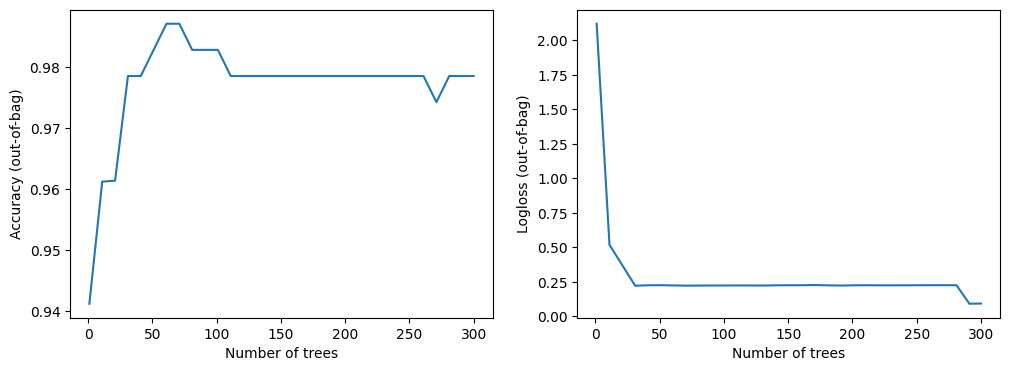

In [20]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

# Re-train the model with a different learning algorithm

Get all of learning algorithm

In [21]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

Using a subset of features

In [22]:
feature_1 = tfdf.keras.FeatureUsage(name="bill_length_mm")
feature_2 = tfdf.keras.FeatureUsage(name="island")

all_features = [feature_1, feature_2]

# Note: This model is only trained with two features. It will not be as good as
# the one trained on all features.

model_2 = tfdf.keras.GradientBoostedTreesModel(
    features=all_features, exclude_non_specified_features=True)

model_2.compile(metrics=["accuracy"])
model_2.fit(train_ds, validation_data=test_ds)

print(model_2.evaluate(test_ds, return_dict=True))

Use /tmp/tmp4ialzzo8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.200009. Found 233 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(111, shape=(), dtype=int32)
Validation dataset read in 0:00:00.311079. Found 111 examples.
Training model...
Model trained in 0:00:00.120664
Compiling model...
Model compiled.
1/1 [==============================] - 0s 229ms/step - loss: 0.0000e+00 - accuracy: 0.9550
{'loss': 0.0, 'accuracy': 0.954954981803894}


**Comment**

- Instead of trainning with all features, we can train with specific features (eg. bill_length_mm, island)
- Note: all columns can be used as input feature (except for the label)

In [23]:
%set_cell_height 300

feature_1 = tfdf.keras.FeatureUsage(name="year", semantic=tfdf.keras.FeatureSemantic.CATEGORICAL)
feature_2 = tfdf.keras.FeatureUsage(name="bill_length_mm")
feature_3 = tfdf.keras.FeatureUsage(name="sex")
all_features = [feature_1, feature_2, feature_3]

model_3 = tfdf.keras.GradientBoostedTreesModel(features=all_features, exclude_non_specified_features=True)
model_3.compile( metrics=["accuracy"])

model_3.fit(train_ds, validation_data=test_ds)

<IPython.core.display.Javascript object>

Use /tmp/tmppzwrxb5o as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.306848. Found 233 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(111, shape=(), dtype=int32)
Validation dataset read in 0:00:00.289314. Found 111 examples.
Training model...
Model trained in 0:00:00.175626
Compiling model...
Model compiled.


**Comment**

- Here, `year` is a CATEGORICAL features

# Hyper-parameters

In [24]:
# A classical but slighly more complex model.
model_6 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500, growing_strategy="BEST_FIRST_GLOBAL", max_depth=8)
model_6.fit(train_ds)

Use /tmp/tmpautguwwh as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.396515. Found 233 examples.
Training model...
Model trained in 0:00:00.374847
Compiling model...
Model compiled.


In [25]:
# A more complex, but possibly, more accurate model.
model_7 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=8,
    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
    )
model_7.fit(train_ds)

Use /tmp/tmphiop6_fl as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.351545. Found 233 examples.
Training model...
Model trained in 0:00:00.667731
Compiling model...


Model compiled.


In [26]:
# A good template of hyper-parameters.
model_8 = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1")
model_8.fit(train_ds)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmprj63xtn9 as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.221390. Found 233 examples.
Training model...
Model trained in 0:00:00.342744
Compiling model...


Model compiled.


In [27]:
# The hyper-parameter templates of the Gradient Boosted Tree model.
print(tfdf.keras.GradientBoostedTreesModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL'}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]


# Feature Preprocessing

In [28]:
%set_cell_height 300

body_mass_g = tf_keras.layers.Input(shape=(1,), name="body_mass_g")
body_mass_kg = body_mass_g / 1000.0

bill_length_mm = tf_keras.layers.Input(shape=(1,), name="bill_length_mm")

raw_inputs = {"body_mass_g": body_mass_g, "bill_length_mm": bill_length_mm}
processed_inputs = {"body_mass_kg": body_mass_kg, "bill_length_mm": bill_length_mm}

# "preprocessor" contains the preprocessing logic.
preprocessor = tf_keras.Model(inputs=raw_inputs, outputs=processed_inputs)

# "model_4" contains both the pre-processing logic and the decision forest.
model_4 = tfdf.keras.RandomForestModel(preprocessing=preprocessor)
model_4.fit(train_ds)

model_4.summary()

<IPython.core.display.Javascript object>

Use /tmp/tmpky8ishdq as temporary training directory
Reading training dataset...


/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/functional.py:641: UserWarning: Input dict contained keys ['island', 'bill_depth_mm', 'flipper_length_mm', 'sex', 'year'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


Training dataset read in 0:00:00.360182. Found 233 examples.
Training model...
Model trained in 0:00:00.107076
Compiling model...
Model compiled.


Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          {'body_mass_kg': (None,   0         
                              1),                                
                              'bill_length_mm': (Non             
                             e, 1)}                              
                                                                 
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (2):
	bill_length_mm
	body_mass_kg

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "bill_length_mm"  0.996678 ################
    2.   "body_mass_kg"  0.454555 

Variable Importance: NUM_AS_ROOT:
    1. "bill_length_mm" 299.000000 ################
    2. 

**Comment**

- Convert `body_mass_g` to Kg

Re-implement logic using TensorFlow Feature Columns.

In [29]:
def g_to_kg(x):
  return x / 1000

feature_columns = [
    tf.feature_column.numeric_column("body_mass_g", normalizer_fn=g_to_kg),
    tf.feature_column.numeric_column("bill_length_mm"),
]

preprocessing = tf_keras.layers.DenseFeatures(feature_columns)

model_5 = tfdf.keras.RandomForestModel(preprocessing=preprocessing)
model_5.fit(train_ds)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Use /tmp/tmpei44fwka as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.288674. Found 233 examples.
Training model...
Model trained in 0:00:00.148277
Compiling model...
Model compiled.


# Training a regression model

In [30]:
# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/abalone_raw.csv -O "/content/drive/MyDrive/Class/nam-4/ky-1/ML/TH1/dataset-demo/abalone.csv"
# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv(path_dataset+"/abalone.csv")

# Display the first 3 examples.
dataset_df.head(3)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [31]:
# Split the dataset into a training and testing dataset.
train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

# Name of the label column.
label = "Rings"

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

2937 examples in training, 1240 examples for testing.


In [32]:
%set_cell_height 300

# Configure the model.
model_7 = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

# Train the model.
model_7.fit(train_ds)

<IPython.core.display.Javascript object>

Use /tmp/tmpo10bgexs as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.262565. Found 2937 examples.
Training model...
Model trained in 0:00:02.806022
Compiling model...
Model compiled.


In [33]:
# Evaluate the model on the test dataset.
model_7.compile(metrics=["mse"])
evaluation = model_7.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")

2/2 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - mse: 4.9807
{'loss': 0.0, 'mse': 4.980695724487305}

MSE: 4.980695724487305
RMSE: 2.231747235796945
